# Plots of Theoretical and Practical Running Time

In [2]:
# import statements
import csv, os, re


# for plots
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import pygtrie

In [4]:
# giant_string.py (modified to generate different n)

string_files = [] # stores names

for j in range(20):
    # Prepare individual text files
    string_files.append('one_giant_string' + str(j) + '.txt')
    with open('one_giant_string' + str(j) + '.txt', 'w', encoding="utf8") as f:
        counter = 0     # Initalize counter variable
        # Load up the complete data of reviews
        with open("one_giant_string.txt", 'r', encoding="utf8") as allData:
            data = allData.read().split()
            # Load millions of words into individual text files
            while counter < j*2000000:
                f.write(data[counter] + " ")
                counter += 1
        '''
        for csvfile in os.listdir('c:/Users/eehie/Desktop/UBC/COSC 320/COSC320-Project/data'):
            if counter < j*100:
                with open('c:/Users/eehie/Desktop/UBC/COSC 320/COSC320-Project/data/' + csvfile, 'r', encoding='utf8') as therealcsv:
                    csvreader = csv.reader(x.replace('\0', '').replace('\r\n', '') for x in therealcsv)
                    content_col = 0
                    i = 0
                    cur_row = []
                    for row in csvreader:
                        if i == 0 and len(row) == 0:
                            break
                        elif i == 0:
                            content_col = row.index('content')
                        else:
                            f.write(re.sub(r'[\n\r\u2028\u2029]+', ' ', row[content_col] + ' '))
                        i += 1
                        '''
        


In [7]:
# abbreviation_converter.py (modified to run through and plot different n)
# print(string_files)
nValues = []
tValues = []

# Step 1: Create a dictionary of abbreviations
abbreviations = {
    "wth": "What The Hell",
    "asap": "As Soon As Possible",
    "btw": "By The Way",
    "diy": "Do It Yourself",
    "eta": "Estimated Time of Arrival",
    "fyi": "For Your Information",
    "idk": "I Don't Know",
    "imo": "In My Opinion",
    "imho": "In My Humble Opinion",
    "omw": "On My Way",
    "ttyl": "Talk To You Later",
    "wip": "Work In Progress",
    "ty": "Thank You",
    "lmao": "Laughing My A** Off",
    "lol": "Laughing Out Loud",
    "rofl": "Rolling On the Floor Laughing",
    "icymi": "In Case You Missed It",
    "tldr": "Too Long Didn't Read",
    "tmi": "Too Much Information",
    "lmk": "Let Me Know",
    "nvm": "Nevermind",
    "ftw": "For The Win",
    "np": "No Problem",
    "jk": "Just Kidding",
    "jw": "Just Wondering",
    "rn": "Right Now",
    "irl": "In Real Life",
    "dae": "Does Anyone Else",
    "gg": "Good Game",
    "smh": "Shaking My Head",
    "ngl": "Not Gonna Lie",
    "ikr": "I Know Right",
    "wtf": "What The F***",
    "aa" : "Alcoholics Anonymous",
    "a.a." : "Alcoholics Anonymous",
    "it's" : "It is",
    "doesn't" : "Does Not",
    "that's" : "That Is",
    "you're" : "You Are",
    "i'm" : "I Am"
}

t = pygtrie.CharTrie()
t['wth']     = "What The Hell"
t["asap"]    = "As Soon As Possible",
t["btw"]     = "By The Way",
t["diy"]     = "Do It Yourself",
t["eta"]     = "Estimated Time of Arrival",
t["fyi"]     = "For Your Information",
t["idk"]     = "I Don't Know",
t["imo"]     = "In My Opinion",
t["imho"]    = "In My Humble Opinion",
t["omw"]     = "On My Way",
t["ttyl"]    = "Talk To You Later",
t["wip"]     = "Work In Progress",
t["ty"]      = "Thank You",
t["lmao"]    = "Laughing My A** Off",
t["lol"]     = "Laughing Out Loud",
t["rofl"]    = "Rolling On the Floor Laughing",
t["icymi"]   = "In Case You Missed It",
t["tldr"]    = "Too Long Didn't Read",
t["tmi"]     = "Too Much Information",
t["lmk"]     = "Let Me Know",
t["nvm"]     = "Nevermind",
t["ftw"]     = "For The Win",
t["np"]      = "No Problem",
t["jk"]      = "Just Kidding",
t["jw"]      = "Just Wondering",
t["rn"]      = "Right Now",
t["irl"]     = "In Real Life",
t["dae"]     = "Does Anyone Else",
t["gg"]      = "Good Game",
t["smh"]     = "Shaking My Head",
t["ngl"]     = "Not Gonna Lie",
t["ikr"]     = "I Know Right",
t["wtf"]     = "What The F***",
t["aa"]      = "Alcoholics Anonymous",
t["a.a."]    = "Alcoholics Anonymous",
t["it's"]    = "It is",
t["doesn't"] = "Does Not",
t["that's"]  = "That Is",
t["you're"]  = "You Are",
t["i'm"]     = "I Am"


# Step 2: Define a function to replace abbreviations in a line


def hash_replace_abbreviations(line, abbrev_dict):
    pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key)
                         for key in abbrev_dict.keys()) + r')\b')
    return pattern.sub(lambda x: abbrev_dict[x.group()], line)

def trie_replace_abbreviations(line, t):
    print(t)
    pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key)
                         for key in t.keys()) + r')\b')
    return pattern.sub(lambda x: t.longest_prefix(x.group())[1], line)

def hash_algorithm():
    output_file = "converted_giant_string.txt"

    for i in range(len(string_files)):
        st = time.time()
        # Read the input and process it all line by line
        with open(string_files[i], 'r', encoding='utf-8') as infile:
            with open(output_file, 'w', encoding='utf-8') as outfile:
                for line in infile:
                    # Replace abbreviations in the current line
                    converted_line = hash_replace_abbreviations(line, abbreviations)
                    # Write the converted line to the output file
                    outfile.write(converted_line)
        ft = time.time()
        running_time = ft - st
        print("Conversion completed.")
        print("Practical Running Time in Seconds: ", running_time)
        nValues.append(i*100)
        tValues.append(running_time)

def algorithm2():
    output_file = "converted_giant_string.txt"

    for i in range(len(string_files)):
        st = time.time()
        with open(string_files[i], 'r', encoding='utf-8') as infile:
            with open(output_file, 'w', encoding='utf-8') as outfile:
                for line in infile:
                    # Replace abbreviations in the current line
                    converted_line = trie_replace_abbreviations(line, abbreviations)
                    # Write the converted line to the output file
                    outfile.write(converted_line)
        ft = time.time()
        running_time = ft - st
        print("Conversion completed.")
        print("Practical Running Time in Seconds: ", running_time)
        nValues.append(i*2000000)
        tValues.append(running_time)

#hash_algorithm()
algorithm2()


Conversion completed.
Practical Running Time in Seconds:  0.001001119613647461
{'wth': 'What The Hell', 'asap': 'As Soon As Possible', 'btw': 'By The Way', 'diy': 'Do It Yourself', 'eta': 'Estimated Time of Arrival', 'fyi': 'For Your Information', 'idk': "I Don't Know", 'imo': 'In My Opinion', 'imho': 'In My Humble Opinion', 'omw': 'On My Way', 'ttyl': 'Talk To You Later', 'wip': 'Work In Progress', 'ty': 'Thank You', 'lmao': 'Laughing My A** Off', 'lol': 'Laughing Out Loud', 'rofl': 'Rolling On the Floor Laughing', 'icymi': 'In Case You Missed It', 'tldr': "Too Long Didn't Read", 'tmi': 'Too Much Information', 'lmk': 'Let Me Know', 'nvm': 'Nevermind', 'ftw': 'For The Win', 'np': 'No Problem', 'jk': 'Just Kidding', 'jw': 'Just Wondering', 'rn': 'Right Now', 'irl': 'In Real Life', 'dae': 'Does Anyone Else', 'gg': 'Good Game', 'smh': 'Shaking My Head', 'ngl': 'Not Gonna Lie', 'ikr': 'I Know Right', 'wtf': 'What The F***', 'aa': 'Alcoholics Anonymous', 'a.a.': 'Alcoholics Anonymous', "it'

AttributeError: 'dict' object has no attribute 'longest_prefix'

Text(0.5, 1.0, 'Actual Running Time')

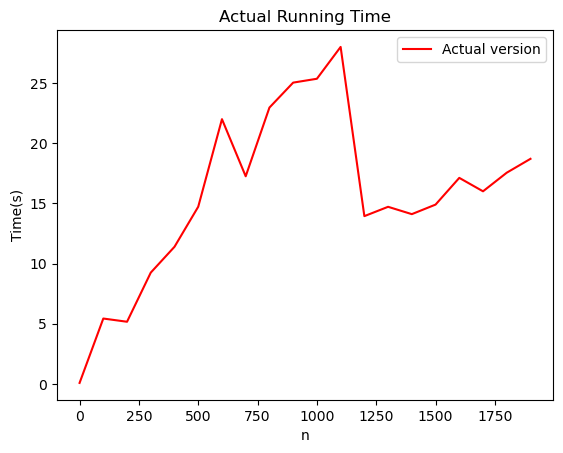

In [17]:
## practical plot
'''
theoretical_running_times = pd.DataFrame.from_dict(seconds_of_running_time)
sns.lineplot(data=theoretical_running_times, x = 'n', y = 'Running Time').set(title = "Practical Running Time of Implementation 1", ylabel = "Running Time (s)")

n = theoretical
linear_data = 
sns.lineplot(data=linear_data, x = 'n', y = 'Running Time')
'''

plt.plot(nValues, tValues, color='red', label="Actual version")

plt.xlabel("n")
plt.ylabel("Time(s)")
plt.legend()
plt.title("Actual Running Time")

Text(0.5, 1.0, 'Theoretical Running Time')

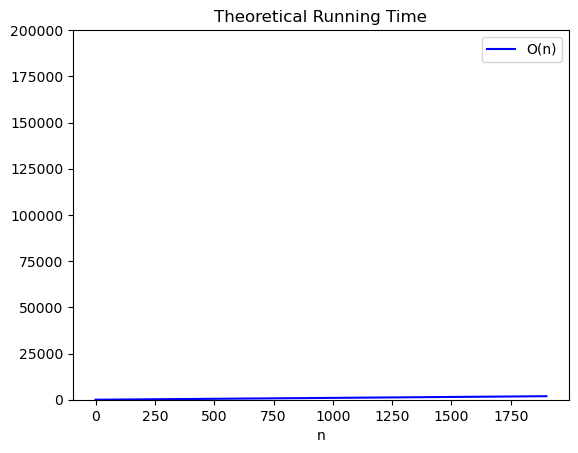

In [18]:
## theoretical plot

plt.plot(nValues, nValues, color='blue', label="O(n)")
#plt.plot(nValues, [np.log(n) for n in nValues], color='green', label="O(n^2)")
plt.xlabel("n")
plt.ylim(0, 200000)
plt.legend()
plt.title("Theoretical Running Time")

In [92]:


def test1():
    string = "Yay, lol I love this song i'm"
    print(replace_abbreviations(string, abbreviations))

test1()

Yay, Laughing Out Loud I love this song I Am
